In [5]:
#import common libraries
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
#change working directory
os.chdir('/Users/kylecamlic/Documents')

In [7]:
df = pd.read_csv('StudentsPerformance.csv')

In [10]:
#display table
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [11]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [14]:
#set the score at which we switch from pass to failure
pass_fail = 59

In [15]:
df.shape

(1000, 8)

In [41]:
#this is good, we have no empty values
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
Math_PassStatus                0
dtype: int64

In [16]:
df.describe

<bound method NDFrame.describe of      gender race/ethnicity parental level of education         lunch  \
0    female        group B           bachelor's degree      standard   
1    female        group C                some college      standard   
2    female        group B             master's degree      standard   
3      male        group A          associate's degree  free/reduced   
4      male        group C                some college      standard   
..      ...            ...                         ...           ...   
995  female        group E             master's degree      standard   
996    male        group C                 high school  free/reduced   
997  female        group C                 high school  free/reduced   
998  female        group D                some college      standard   
999  female        group D                some college  free/reduced   

    test preparation course  math score  reading score  writing score  
0                      none  

In [17]:
#lets analyze some data 

#first we know that generally, students with more educated parents will do better on tests

#second, we also know that students who have completed 
#a prep course are also going to do better most of the time

<AxesSubplot:xlabel='gender', ylabel='count'>

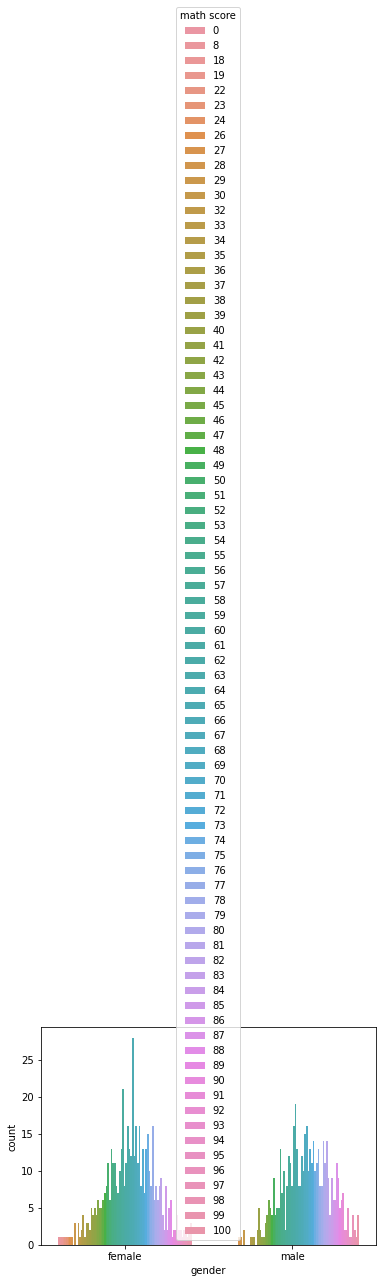

In [34]:
#see math scores relative to genders 
sns.countplot(x='gender', hue='math score', data=df)

In [26]:
#get our data types
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
dtype: object

In [35]:
#create new column to assess who failed and passed the math exam
#we have 709 students who passed the math exam part and 291 who failed
df['Math_PassStatus'] = np.where(df['math score']<pass_fail, 'F', 'P')
df.Math_PassStatus.value_counts()

P    709
F    291
Name: Math_PassStatus, dtype: int64

In [38]:
#our number of rows is our total student number
Total_students = 1000

In [39]:
Math_pass_rate = (709/Total_students)*100
Math_fail_rate = (291/Total_students)*100

print(Math_pass_rate, '% of students passed the math exam')
print(Math_fail_rate, '% of students failed the math exam')

70.89999999999999 % of students passed the math exam
29.099999999999998 % of students failed the math exam


In [40]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus
0,female,group B,bachelor's degree,standard,none,72,72,74,P
1,female,group C,some college,standard,completed,69,90,88,P
2,female,group B,master's degree,standard,none,90,95,93,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,F
4,male,group C,some college,standard,none,76,78,75,P


<AxesSubplot:xlabel='gender', ylabel='count'>

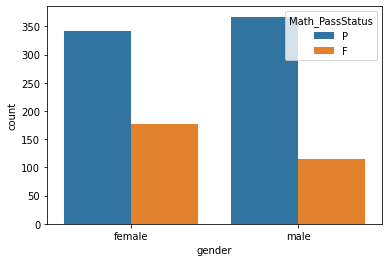

In [42]:
sns.countplot(x='gender', hue='Math_PassStatus', data=df)

In [50]:
#we see that males generally outperformed the females on specifically the math part of the exam
females_pass = df[df.gender == 'female'][df.Math_PassStatus == 'P']
#total number of females that passed the math test

<ipython-input-50-18ae5cd1d03e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  females_pass = df[df.gender == 'female'][df.Math_PassStatus == 'P']


In [51]:
#total number of females that failed the math test
females_fail = df[df.gender == 'female'][df.Math_PassStatus == 'F']

<ipython-input-51-132b1789937c>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  females_fail = df[df.gender == 'female'][df.Math_PassStatus == 'F']


In [54]:
print(len(females_pass))
print(len(females_fail))


342
176


In [55]:
total_females = 342+176

In [58]:
Math_fail_rate_females = (176/total_females)*100
Math_pass_rate_females = (342/total_females)*100

In [59]:
print(Math_fail_rate_females,'% of females failed the math exam')
print(Math_pass_rate_females, '% of females passed the math exam')

33.97683397683397 % of females failed the math exam
66.02316602316603 % of females passed the math exam


In [60]:
#now for males who passed
males_pass = df[df.gender == 'male'][df.Math_PassStatus == 'P']
print(len(males_pass))

367


<ipython-input-60-5357cdf2ef2d>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  males_pass = df[df.gender == 'male'][df.Math_PassStatus == 'P']


In [61]:
males_fail = df[df.gender == 'male'][df.Math_PassStatus == 'F']
print(len(males_fail))

115


<ipython-input-61-96c5fd4e903e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  males_fail = df[df.gender == 'male'][df.Math_PassStatus == 'F']


In [62]:
total_males = 115+367

In [63]:
Math_fail_rate_males = (176/total_males)*100
Math_pass_rate_males = (342/total_males)*100

print(Math_fail_rate_males, '% of males failed the math exam')
print(Math_pass_rate_males, '% of males passed the math exam')

36.51452282157676 % of males failed the math exam
70.95435684647303 % of males passed the math exam


In [65]:
#So we see when analyzing in further depth that males slighty 
#outperformed females in the math section of the test 
#(71% pass rate for males vs 66 pass rate for females)

[None, None, None, None, None, None, None, None, None, None, None, None]

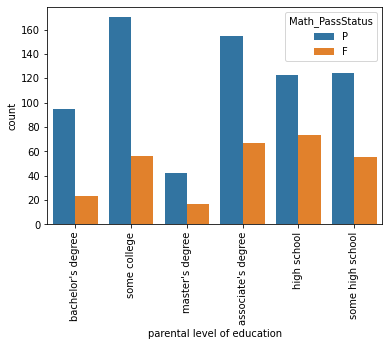

In [70]:
#lets look at how parents education level impacts our math pass rates
#switch the labels 90 degrees so they are readable
plot1 = sns.countplot(x='parental level of education', data = df, hue='Math_PassStatus')
plt.setp(plot1.get_xticklabels(), rotation=90)

In [71]:
#as expected we see that, generally speaking, as parents education lessens, the test scores worsen

In [72]:
#however we also see that in some cases this doesnt really make much of a difference
#for instance, lets look at the rate at which 
#students with parents in a 'masters' vs students with parents with 'some high school'
MD_pass_total = df[df['parental level of education'] == "master's degree"][df.Math_PassStatus == 'P']
print(len(MD_pass_total))

42


<ipython-input-72-b33b51f99927>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MD_pass_total = df[df['parental level of education'] == "master's degree"][df.Math_PassStatus == 'P']


In [74]:
MD_fail_total = df[df['parental level of education'] == "master's degree"][df.Math_PassStatus == 'F']
print(len(MD_fail_total))

total_MD_parented_students = 42+(len(MD_fail_total))
print(total_MD_parented_students)

17
59


<ipython-input-74-941e686d97bd>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  MD_fail_total = df[df['parental level of education'] == "master's degree"][df.Math_PassStatus == 'F']


In [75]:
#so we have 59 total students with masters educated parents and 42 passed, 17 failed:
MD_pass_rate_math = (42/59)*100
MD_fail_rate_math = (17/59)*100

print(MD_pass_rate_math, '% of students with masters educated parents passed the math exam')
print(MD_fail_rate_math, '% of students with masters educated parents failed the math exam')

71.1864406779661 % of students with masters educated parents passed the math exam
28.8135593220339 % of students with masters educated parents failed the math exam


In [77]:
#Now lets look at pass rates for students with parents who are 'some high school' educated
SHS_pass_total = df[df['parental level of education'] == "some high school"][df.Math_PassStatus == 'P']
print(len(SHS_pass_total))

SHS_fail_total = df[df['parental level of education'] == "some high school"][df.Math_PassStatus == 'F']
print(len(SHS_fail_total))

124
55


<ipython-input-77-5dfb5e05e073>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  SHS_pass_total = df[df['parental level of education'] == "some high school"][df.Math_PassStatus == 'P']
<ipython-input-77-5dfb5e05e073>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  SHS_fail_total = df[df['parental level of education'] == "some high school"][df.Math_PassStatus == 'F']


In [78]:
SHS_total = 124+55

In [80]:
SHS_pass_rate_math = (124/SHS_total)*100
SHS_fail_rate_math = (55/SHS_total)*100

print(SHS_pass_rate_math, '% of students with some high school educated parents passed the math exam')
print(SHS_fail_rate_math, '% of students with some high school educated parents failed the math exam')

69.27374301675978 % of students with some high school educated parents passed the math exam
30.726256983240223 % of students with some high school educated parents failed the math exam


In [81]:
#so we see that there is less than a 2% difference
#in the pass and fail rates of students of parents with masters vs parents with 'some high school'

In [86]:
#Now lets model and use our independent variables to predict a Pass or Fail on the Math portion for our students
#so given a student with all his or her independent variables, 
#we will predict a pass or fail and assess our model accuracy

In [87]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Math_PassStatus
0,female,group B,bachelor's degree,standard,none,72,72,74,P
1,female,group C,some college,standard,completed,69,90,88,P
2,female,group B,master's degree,standard,none,90,95,93,P
3,male,group A,associate's degree,free/reduced,none,47,57,44,F
4,male,group C,some college,standard,none,76,78,75,P


In [89]:
#to model we want numeric data
df.dtypes
#we should find a way to convert our objects to numeric data

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
reading score                   int64
writing score                   int64
Math_PassStatus                object
dtype: object

In [90]:
#we are not looking at our writing and reading scores for the sake of this model, 
#so we will drop these columns
df = df.drop(['writing score', 'reading score'], axis=1)

In [91]:
df.dtypes

gender                         object
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
Math_PassStatus                object
dtype: object

In [92]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,Math_PassStatus
0,female,group B,bachelor's degree,standard,none,72,P
1,female,group C,some college,standard,completed,69,P
2,female,group B,master's degree,standard,none,90,P
3,male,group A,associate's degree,free/reduced,none,47,F
4,male,group C,some college,standard,none,76,P


In [94]:
#to make our model numeric we will replace male with 1 and female with 0
df.replace('male', 1, inplace=True)
df.replace('female', 0, inplace=True)

In [95]:
df.dtypes

gender                          int64
race/ethnicity                 object
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
Math_PassStatus                object
dtype: object

In [96]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,Math_PassStatus
0,0,group B,bachelor's degree,standard,none,72,P
1,0,group C,some college,standard,completed,69,P
2,0,group B,master's degree,standard,none,90,P
3,1,group A,associate's degree,free/reduced,none,47,F
4,1,group C,some college,standard,none,76,P


In [98]:
#see how many unique values for race/ethnicity that we have in our data
df['race/ethnicity'].unique()

array(['group B', 'group C', 'group A', 'group D', 'group E'],
      dtype=object)

In [99]:
#replace our ethnicities with numeric values
df.replace('group A', 1, inplace=True)
df.replace('group B', 2, inplace=True)
df.replace('group C', 3, inplace=True)
df.replace('group D', 4, inplace=True)
df.replace('group E', 5, inplace=True)

In [100]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,Math_PassStatus
0,0,2,bachelor's degree,standard,none,72,P
1,0,3,some college,standard,completed,69,P
2,0,2,master's degree,standard,none,90,P
3,1,1,associate's degree,free/reduced,none,47,F
4,1,3,some college,standard,none,76,P


In [101]:
df.dtypes

gender                          int64
race/ethnicity                  int64
parental level of education    object
lunch                          object
test preparation course        object
math score                      int64
Math_PassStatus                object
dtype: object

In [102]:
#see how many unique values for parental education that we have in our data
df['parental level of education'].unique()

array(["bachelor's degree", 'some college', "master's degree",
       "associate's degree", 'high school', 'some high school'],
      dtype=object)

In [103]:
#replace our parental education levels with numeric values
#we will give the lowest numbers to the lowest education levels, respectively
df.replace('some high school', 1, inplace=True)
df.replace('high school', 2, inplace=True)
df.replace('some college', 3, inplace=True)
df.replace("associate's degree", 4, inplace=True)
df.replace("bachelor's degree", 5, inplace=True)
df.replace("master's degree", 6, inplace=True)

In [104]:
df.dtypes

gender                          int64
race/ethnicity                  int64
parental level of education     int64
lunch                          object
test preparation course        object
math score                      int64
Math_PassStatus                object
dtype: object

In [105]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,Math_PassStatus
0,0,2,5,standard,none,72,P
1,0,3,3,standard,completed,69,P
2,0,2,6,standard,none,90,P
3,1,1,4,free/reduced,none,47,F
4,1,3,3,standard,none,76,P


In [106]:
#see how many unique values for 'lunch' that we have in our data
df['lunch'].unique()

array(['standard', 'free/reduced'], dtype=object)

In [107]:
#we will replace standard with 0 and free/reduced with 1
df.replace('standard', 0, inplace=True)
df.replace('free/reduced', 1, inplace=True)

In [108]:
df.dtypes

gender                          int64
race/ethnicity                  int64
parental level of education     int64
lunch                           int64
test preparation course        object
math score                      int64
Math_PassStatus                object
dtype: object

In [109]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,Math_PassStatus
0,0,2,5,0,none,72,P
1,0,3,3,0,completed,69,P
2,0,2,6,0,none,90,P
3,1,1,4,1,none,47,F
4,1,3,3,0,none,76,P


In [110]:
#see how many unique values for 'test preparation course' that we have in our data
df['test preparation course'].unique()

array(['none', 'completed'], dtype=object)

In [111]:
#replace none with 0 and completed with 1
df.replace('none', 0, inplace=True)
df.replace('completed', 1, inplace=True)

In [112]:
df.dtypes


gender                          int64
race/ethnicity                  int64
parental level of education     int64
lunch                           int64
test preparation course         int64
math score                      int64
Math_PassStatus                object
dtype: object

In [113]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,Math_PassStatus
0,0,2,5,0,0,72,P
1,0,3,3,0,1,69,P
2,0,2,6,0,0,90,P
3,1,1,4,1,0,47,F
4,1,3,3,0,0,76,P


In [116]:
#for the sake of this model we no longer need the math scores specifically
#what we are looking at is only if the students passed or failed
#a failure for the sake of this model is less than a 59
#so we can drop the math scores column

In [117]:
df = df.drop(['math score'], axis=1)

In [118]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Math_PassStatus
0,0,2,5,0,0,P
1,0,3,3,0,1,P
2,0,2,6,0,0,P
3,1,1,4,1,0,F
4,1,3,3,0,0,P


In [119]:
df.dtypes

gender                          int64
race/ethnicity                  int64
parental level of education     int64
lunch                           int64
test preparation course         int64
Math_PassStatus                object
dtype: object

In [120]:
#lastly, before modeling we will change our Math_PassStatus column
#and we will replace P with 0 and F with 1
df.replace('P', 0, inplace=True)
df.replace('F', 1, inplace=True)

In [121]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,Math_PassStatus
0,0,2,5,0,0,0
1,0,3,3,0,1,0
2,0,2,6,0,0,0
3,1,1,4,1,0,1
4,1,3,3,0,0,0


In [122]:
df.dtypes

gender                         int64
race/ethnicity                 int64
parental level of education    int64
lunch                          int64
test preparation course        int64
Math_PassStatus                int64
dtype: object

In [123]:
#now we have all int64 dtypes and are ready to model

In [124]:
#lets import our modeling libraries
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [125]:
#we will start with assessing logistic regression

In [127]:
#make sure we still have no missing data
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
Math_PassStatus                0
dtype: int64

In [129]:
#drop our Math_PassStatus column for X, and make Math_PassStatus column our y value,
#we want to predict y as accurate as possible
X = df.drop('Math_PassStatus', axis=1)
y = df['Math_PassStatus']

In [162]:
#split data into 50% testing and 50% training since our data is relatively small
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [163]:
#make our logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [164]:
Math_Pass_Status_predictions = model.predict(x_test)

print(Math_Pass_Status_predictions)

[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 

In [165]:
#check precision, recall, f1 score
print(classification_report(y_test, Math_Pass_Status_predictions))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       361
           1       0.60      0.35      0.44       139

    accuracy                           0.75       500
   macro avg       0.69      0.63      0.64       500
weighted avg       0.73      0.75      0.73       500



In [173]:
#logistic regression decent at 75% and would help, but lets now try a random forest model

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=0)

In [175]:
#import randome forest model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, random_state=0)
classifier.fit(X_train, y_train)
predictions_math_RF = classifier.predict(X_test)

In [176]:
#print new predictions using Random Forest
print(predictions_math_RF)

[0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 0 1 0 1 0 1 0 1 0 0
 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 1 0 1 0 0 1 0 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 1 0 0 1 1 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1
 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1
 1 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 0 0 1 0
 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 1 1 0 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 1 0 1 1 0 0 

In [177]:
#Lets assess our RF model accuracy as opposed to Logistic Regression
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, predictions_math_RF))
print(accuracy_score(y_test, predictions_math_RF))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79       361
           1       0.44      0.39      0.41       139

    accuracy                           0.69       500
   macro avg       0.61      0.60      0.60       500
weighted avg       0.68      0.69      0.69       500

0.692


In [196]:
#we see that, in this case, Logistic Regression is more accurate than RF by about 6%
#we note that our model could ideally be more accurate, 
#but we have relatively small data in our csv file, (only 1000 rows)